# Random Walk Series

In [1]:
import random
import matplotlib.pyplot as plt

random.seed(1)

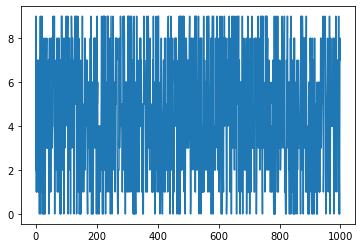

In [2]:
# Creating a list of random numbers
series = [random.randrange(10) for i in range(1000)]
plt.plot(series)
plt.show()

A random walk is different from a list of random numbers, because the next value in the sequence is a modification of the previous value in the sequence. This dependence provides some consistency from step-to-step rather than the large jumps that a series of independent, random numbers provides. 

1. Start with a random number
2. Randomly select a -1 or +1 and add it to the observation from the previous time step. 
3. Repeat step 2 for as long as you want the series to be

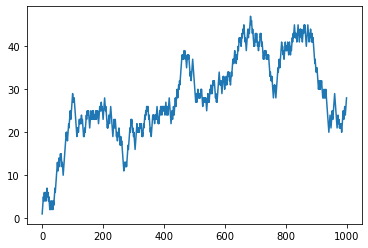

In [3]:
random_walk = []
random_walk.append(-1 if random.random() < 0.5 else 1) # adding the first number randomly
for i in range(1, 1000):
    movement = -1 if random.random() < 0.5 else 1 # randomly determine the direction and magnitude of the next move
    value = random_walk[i-1] + movement # Add this to the previous value
    random_walk.append(value) # append this value to the series
    
plt.plot(random_walk)
plt.show()

This looks quite different from random data, and even begins to mimic a time series for the price of a security on the stock market (with some distinct differences to expert traders). 

## Random Walk and Autocorrelation

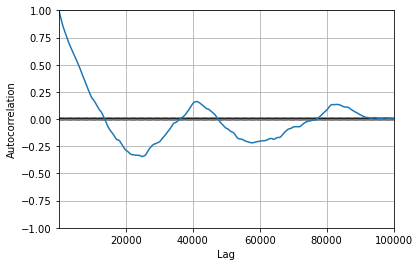

In [7]:
from pandas.plotting import autocorrelation_plot
random.seed(1)
random_walk = list()
random_walk.append(-1 if random.random() < 0.5 else 1)
for i in range(1,100000):
    movement = -1 if random.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
autocorrelation_plot(random_walk)
plt.show()

Generally, we see that there is a strong positive correlation with more recent time values (as expected from the dependent nature of generating new values from recent ones). That correlation eventually drops below zero and then osscilates around zero where it will converge to zero over time as the series continues to grow longer.

## Random Walk and Stationarity

A stationary time series is one where the values are not a function of time. We can expect a random walk to be non-stationary. In fact, all random walk processes are non-stationary (but not all non-stationary time series are random walks). A non-stationary time series does not have a consistent mean and/or variance over time. We can confirm this via the Augmented Dickey-Fuller test, using the `adfuller()` funtion in the `statsmodels` library.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# generate random walk
random.seed(1)
random_walk = []
random_walk.append(-1 if random.random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)   

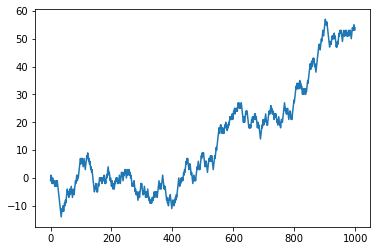

In [10]:
plt.plot(random_walk)
plt.show()

$H_0$ = The series is *non-stationary*

$H_a$ = The series is *stationary*

In [9]:
# statistical test
result = adfuller(random_walk)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.34160454935399903
p-value: 0.9791747967918744
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


The test statistic of 0.3416 is larger than any of the critical values. Furthermore, the p-value is quite large. As such, we fail to reject the null hypothesis, and we can claim that the time series has evidence of being non-stationary. 

We can extract a stationary series from our time series data by taking the first difference (the difference between values):

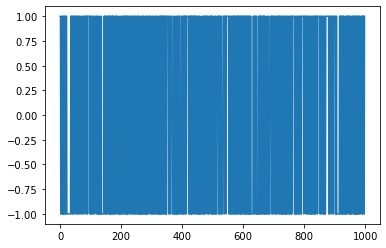

In [14]:
diff = []
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i-1]
    diff.append(value)
    
# line plot
plt.plot(diff)
plt.show()

In [15]:
diff_result = adfuller(diff)
print(f'ADF Statistic: {diff_result[0]}')
print(f'p-value: {diff_result[1]}')
print('Critical Values:')
for key, value in diff_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -31.08482422990862
p-value: 0.0
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


This difference graph also makes it clear that we have no information to work with here other than a series of random moves. There is no structure to learn.

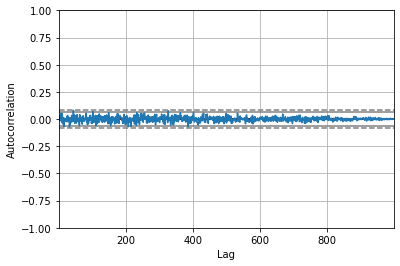

In [16]:
# create random walk
random.seed(1)
random_walk = list()
random_walk.append(-1 if random.random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
# take difference
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i-1]
    diff.append(value)
    
# line plot
autocorrelation_plot(diff)
plt.show()

## Predicting a Random Walk

A random walk is unpredictable. While no time series is truly a random walk, the more it approximates a random walk, the less predictible it becomes. We can expect that the best prediction we could make would be to use the observation at the previous time step as what will happen in the next time step. This is a naive forecast, or a persistence model. 

In [1]:
# persistence forecasts for a random walk
import random
from sklearn.metrics import mean_squared_error
import math

In [2]:
# generate the random walk
random.seed(1)
random_walk = []
random_walk.append(-1 if random.random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

In [3]:
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[:train_size], random_walk[train_size:]

In [9]:
# persistence
predictions = []
history = train[-1]
for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]
rmse = math.sqrt(mean_squared_error(test,predictions))
print(f'Persistence RMSE: {rmse}')

Persistence RMSE: 1.0


An error that beginners make is to assume that if the range of error (variance) is known, then we can make predictions using a random walk type process. That is, if we know the error is either -1 or 1, then why not make predictions by adding a randomly selected -1 or 1 to the previous value? 

The likelihood of matching a random walk better than a persistence method is extremely small, and as the predictions deviate further from the test set values, the magnitude of the error will increase consistently. 

In [10]:
from random import seed
from random import random
from math import sqrt
# generate the random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history + (-1 if random() < 0.5 else 1)
    predictions.append(yhat)
    history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Random RMSE: %.3f' % rmse)

Random RMSE: 1.328


## Is Your Time Series a Random Walk?
- The time series shows a strong temporal dependence that decays linearly or in a similar pattern
- The time series is non-stationary and making it stationary shows no obviously learnable structure in the data
- The persistence model provides the best source of reliable predictions

If you can't beat the baseline persistence model, then you are probably working with a random walk. 